# Ferature Selection For RBC Transfusion 

In [13]:
import pandas as pd
import numpy as np 
from numpy import mean
from numpy import std
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline


In [16]:
from sklearn import metrics


from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score, 
                             f1_score,
                             roc_auc_score, 
                             precision_recall_curve,
                             balanced_accuracy_score,
                             auc)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

## LassoCV Feature Selection

In [33]:
from sklearn.linear_model import Lasso

In [34]:
features_train = pd.read_excel(r"Lasso_FS.xlsx",sheet_name = "features_train")
target_train = pd.read_excel(r"Lasso_FS.xlsx",sheet_name = "target_train")

In [35]:
features_train = features_train.iloc[:,:-1] 
target_train = target_train.iloc[:,-1]

In [36]:
scaler = StandardScaler()
X = scaler.fit_transform(features_train)
Y = target_train
names = features_train.columns

In [37]:
from sklearn.linear_model import LassoCV
model_lasso = LassoCV(alphas = [0.1,1,0.001, 0.01]).fit(X,Y)
model_lasso.alpha_


0.01

In [38]:
import pandas as pd
coef = pd.Series(model_lasso.coef_, index = names)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Lasso picked 29 variables and eliminated the other 32 variables


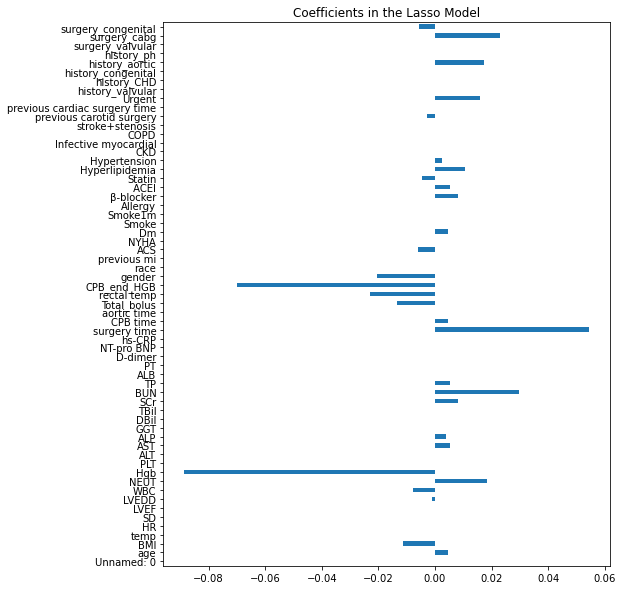

In [39]:
import matplotlib.pyplot as plt
imp_coef = pd.concat([coef.sort_values().head(3),
                     coef.sort_values().tail(3)])

plt.rcParams['figure.figsize'] = (8.0, 10.0)
coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show() 


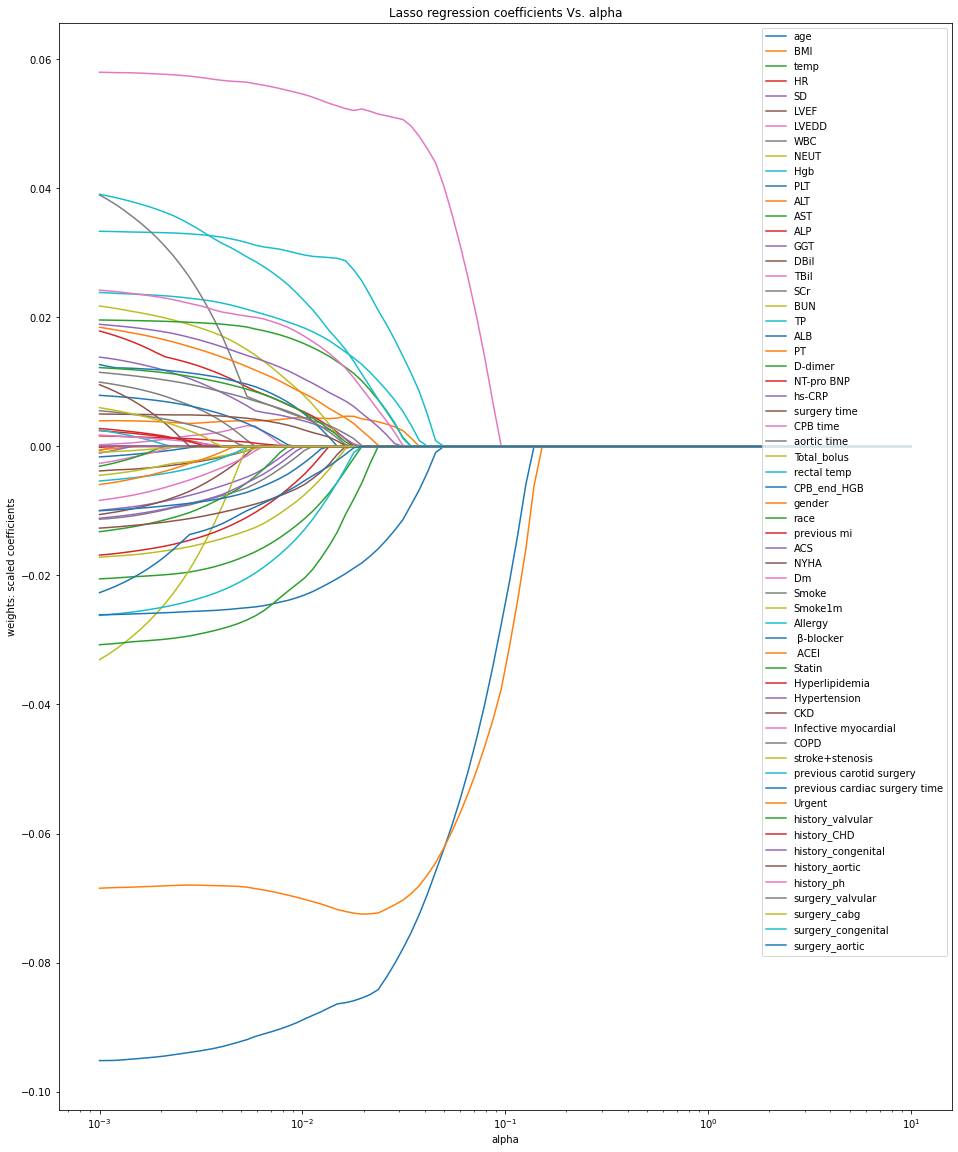

In [40]:
alpha_lasso = 10**np.linspace(-3,1,100)
lasso = Lasso()
coefs_lasso = []

for i in alpha_lasso:
    lasso.set_params(alpha = i)
    lasso.fit(X, Y)
    coefs_lasso.append(lasso.coef_)
    
plt.figure(figsize=(16,20))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(features.columns,loc="upper right")

plt.savefig("lassorbcfw.svg",dpi=300)
plt.show()

## Based on the above lasso selected variables,the final variables were determined in consultation with experts 